# Music

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *

In [3]:
import music21
from music21 import *
from IPython.display import Image, Audio

## Let's find a short song

In [4]:
predicate = lambda x: 400 < x < 500
s = corpus.corpora.CoreCorpus().search(predicate, 'noteCount')

In [7]:
list(s)[:5]

[<music21.metadata.bundles.MetadataEntry: bach_bwv126_6_mxl>,
 <music21.metadata.bundles.MetadataEntry: bach_bwv137_5_mxl>,
 <music21.metadata.bundles.MetadataEntry: bach_bwv185_6_mxl>,
 <music21.metadata.bundles.MetadataEntry: bach_bwv19_7_mxl>,
 <music21.metadata.bundles.MetadataEntry: bach_bwv190_7_mxl>]

In [8]:
b = corpus.parse('bach/bwv126.6')
# b = corpus.parse('schoenberg/opus19', 6)

In [10]:
list(b.flat)[:20]

[<music21.text.TextBox "PDF © 2004...">,
 <music21.text.TextBox "BWV 126.6">,
 <music21.instrument.Instrument P1: Soprano: >,
 <music21.instrument.Instrument P2: Alto: >,
 <music21.instrument.Instrument P3: Tenor: >,
 <music21.instrument.Instrument P4: Bass: >,
 <music21.layout.SystemLayout>,
 <music21.layout.SystemLayout>,
 <music21.layout.StaffLayout distance 130, staffNumber 1, staffSize None, staffLines None>,
 <music21.layout.SystemLayout>,
 <music21.layout.StaffLayout distance 130, staffNumber 1, staffSize None, staffLines None>,
 <music21.layout.SystemLayout>,
 <music21.layout.StaffLayout distance 130, staffNumber 1, staffSize None, staffLines None>,
 <music21.layout.ScoreLayout>,
 <music21.clef.TrebleClef>,
 <music21.clef.TrebleClef>,
 <music21.clef.BassClef>,
 <music21.clef.BassClef>,
 <music21.key.Key of a minor>]

In [11]:
b.flat.show('midi')

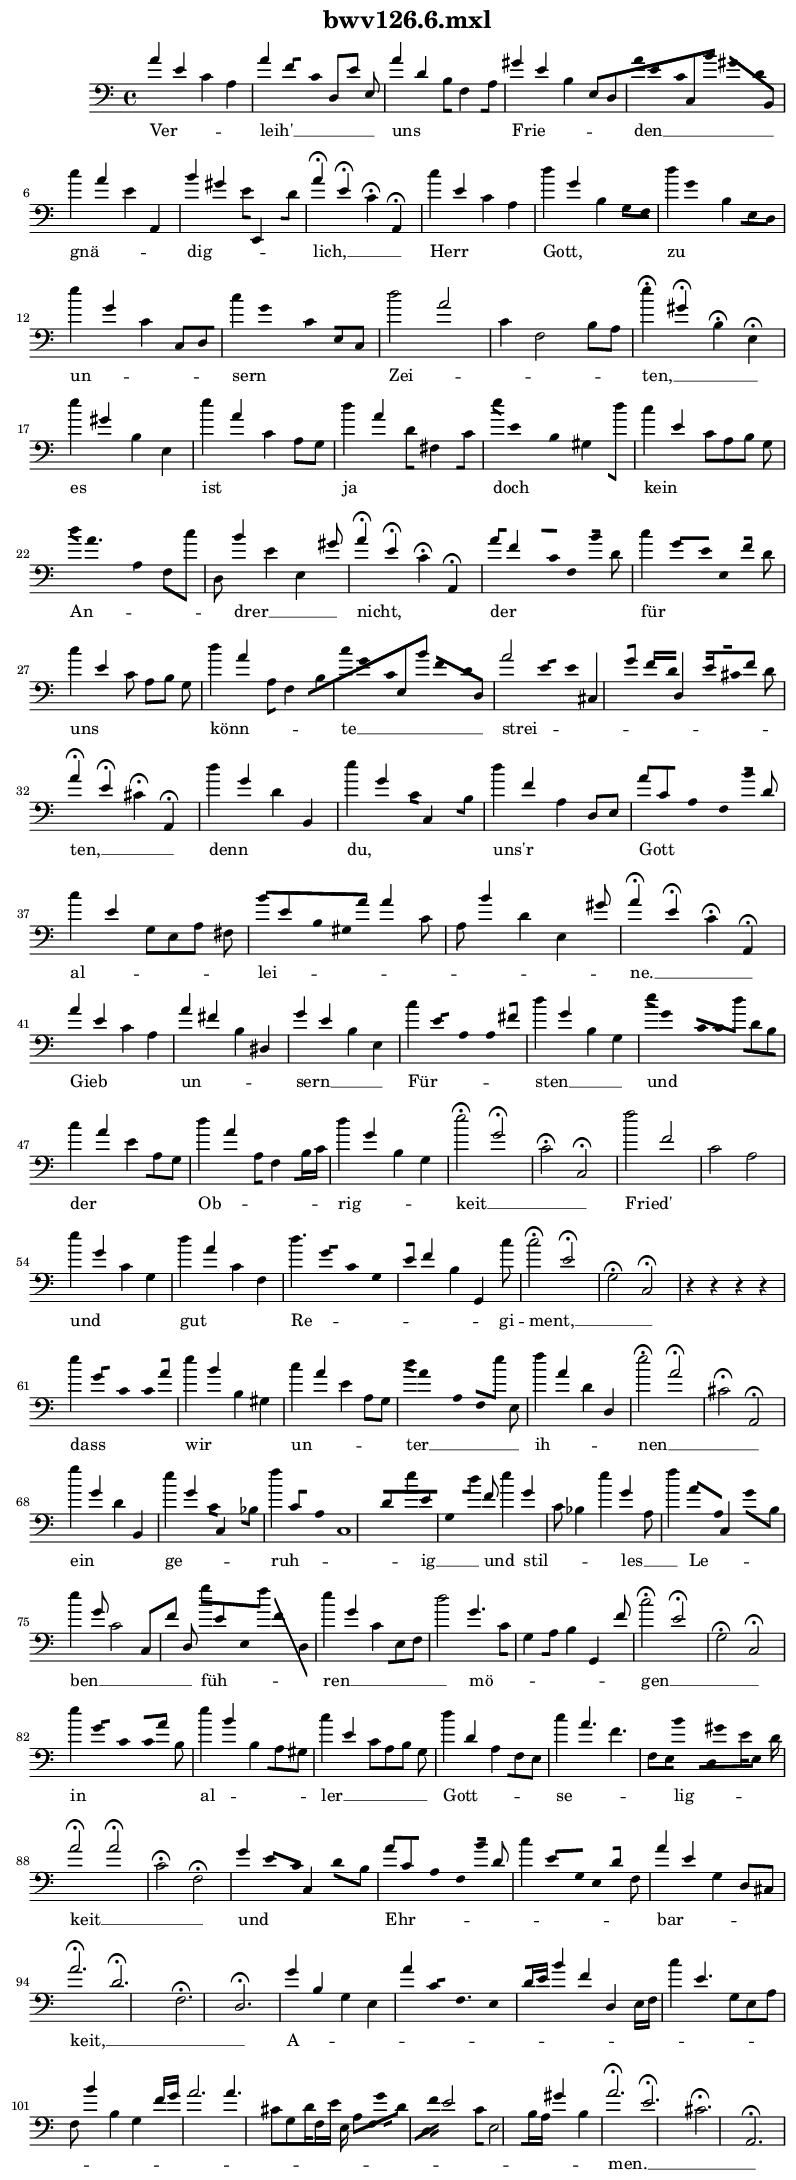

In [12]:
Image(filename=str(b.flat.write('lily.png')))

In [ ]:
dir(b)

In [13]:
ts = b.flat.timeSignature

In [14]:
ts.beatDuration

<music21.duration.Duration 1.0>

### Convert to chords

In [15]:
bChords = b.chordify()

In [17]:
bChords.show('midi')

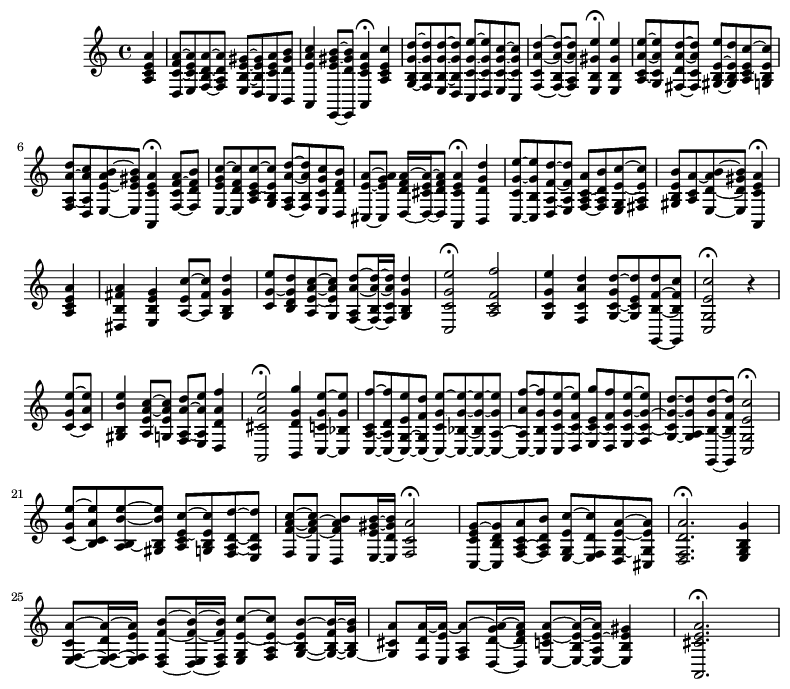

In [18]:
Image(filename=str(bChords.write('lily.png')))

In [25]:
list(bChords.flat)

 <music21.instrument.Instrument P1: Soprano: >,
 <music21.layout.SystemLayout>,
 <music21.clef.TrebleClef>,
 <music21.key.Key of a minor>,
 <music21.meter.TimeSignature 4/4>,
 <music21.chord.Chord A3 C4 E4 A4>,
 <music21.chord.Chord D3 C4 F4 A4>,
 <music21.chord.Chord E3 C4 E4 A4>,
 <music21.chord.Chord F3 B3 D4 A4>,
 <music21.chord.Chord F3 A3 D4 A4>,
 <music21.chord.Chord E3 B3 E4 G#4>,
 <music21.chord.Chord D3 B3 E4 G#4>,
 <music21.chord.Chord C3 C4 E4 A4>,
 <music21.chord.Chord B2 D4 G#4 B4>,
 <music21.chord.Chord A2 E4 A4 C5>,
 <music21.chord.Chord E2 E4 G#4 B4>,
 <music21.chord.Chord E2 D4 G#4 B4>,
 <music21.chord.Chord A2 C4 E4 A4>,
 <music21.chord.Chord A3 C4 E4 C5>,
 <music21.chord.Chord G3 B3 G4 D5>,
 <music21.chord.Chord F3 B3 G4 D5>,
 <music21.chord.Chord E3 B3 G4 D5>,
 <music21.chord.Chord D3 B3 G4 D5>,
 <music21.chord.Chord C3 C4 G4 E5>,
 <music21.chord.Chord D3 C4 G4 E5>,
 <music21.chord.Chord E3 C4 G4 C5>,
 <music21.chord.Chord C3 C4 G4 C5>,
 <music21.chord.Chord F3 C4 

In [24]:
list(bFlatChords.flat)

[<music21.text.TextBox "PDF © 2004...">,
 <music21.text.TextBox "BWV 126.6">,
 <music21.instrument.Instrument P1: Soprano: >,
 <music21.instrument.Instrument P2: Alto: >,
 <music21.instrument.Instrument P3: Tenor: >,
 <music21.instrument.Instrument P4: Bass: >,
 <music21.layout.SystemLayout>,
 <music21.layout.SystemLayout>,
 <music21.layout.StaffLayout distance 130, staffNumber 1, staffSize None, staffLines None>,
 <music21.layout.SystemLayout>,
 <music21.layout.StaffLayout distance 130, staffNumber 1, staffSize None, staffLines None>,
 <music21.layout.SystemLayout>,
 <music21.layout.StaffLayout distance 130, staffNumber 1, staffSize None, staffLines None>,
 <music21.layout.ScoreLayout>,
 <music21.clef.TrebleClef>,
 <music21.clef.TrebleClef>,
 <music21.clef.BassClef>,
 <music21.clef.BassClef>,
 <music21.key.Key of a minor>,
 <music21.key.KeySignature of no sharps or flats>,
 <music21.key.KeySignature of no sharps or flats>,
 <music21.key.KeySignature of no sharps or flats>,
 <music21.m

### Flat Chordify

In [19]:
bFlatChords = b.flat.chordify()

In [20]:
bFlatChords.show('midi')

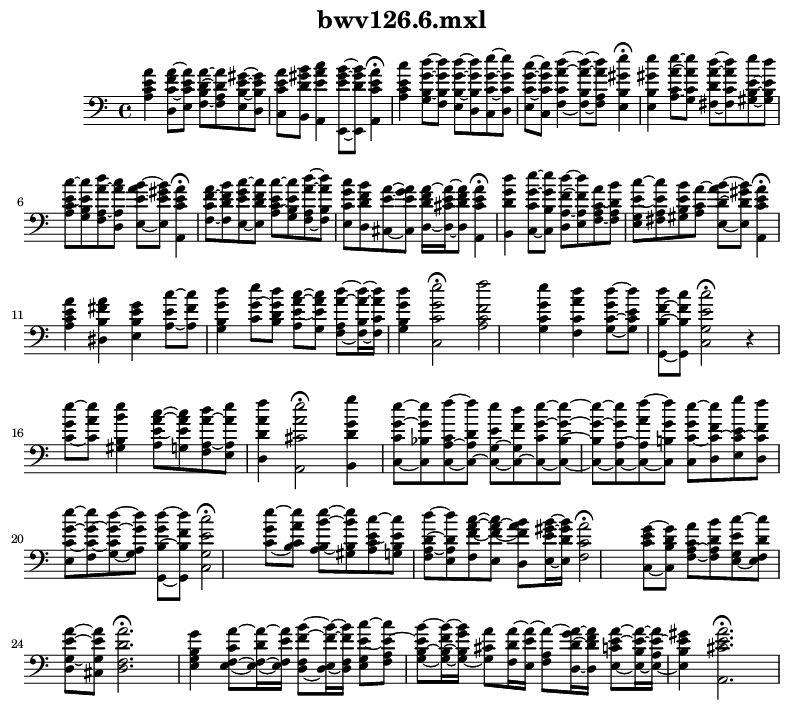

In [22]:
Image(filename=str(bFlatChords.write('lily.png')))

## Convert bach to encoding and back

In [64]:
# begin
b.show('midi')

In [31]:
import midi_to_encoding as m2e

In [ ]:
# note_offset = 45 if 'note_range38' in str(file) else 33
# sample_freq = 12 if 'sample_freq12' in str(file) else 4

In [34]:
note_offset = 45
note_range = 38
sample_freq = 12

In [65]:
chord_out = m2e.stream_to_chordwise(b.flat, False, note_range, note_offset, sample_freq)

In [66]:
notewise_out = m2e.chord_to_notewise(chord_out, sample_freq=sample_freq)

In [67]:
import utils

In [68]:
notewise_out

'p12 p15 p19 p24 wait11 endp12 endp19 wait1 p5 p15 p20 p24 wait5 endp5 endp20 wait1 p7 p19 wait5 endp7 endp15 endp19 wait1 p8 p14 p17 p24 wait5 endp14 wait1 p12 wait5 endp8 endp12 endp17 endp24 wait1 p7 p14 p19 p23 wait5 endp7 wait1 p5 wait5 endp5 endp14 endp23 wait1 p3 p15 p19 p24 wait5 endp3 endp15 endp19 endp24 wait1 p2 p17 p23 p26 wait5 endp2 endp17 endp23 endp26 wait1 p0 p19 p24 p27 wait11 endp0 endp24 endp27 wait1 p7 p19 p23 p26 wait5 endp19 wait1 p17 wait5 endp7 endp17 endp23 endp26 wait1 p0 p15 p19 p24 wait11 endp0 endp24 wait1 p12 p15 p19 p27 wait11 endp12 endp15 endp19 endp27 wait1 p10 p14 p22 p29 wait5 endp10 wait1 p8 wait5 endp8 wait1 p7 p14 p22 p29 wait5 endp7 wait1 p5 wait5 endp5 endp14 endp29 wait1 p3 p15 p22 p31 wait5 endp3 wait1 p5 wait5 endp5 endp31 wait1 p7 p15 p22 p27 wait5 endp7 wait1 p3 wait5 endp3 endp22 endp27 wait1 p8 p15 p24 p29 wait11 endp15 wait1 p14 wait5 endp14 wait1 p12 wait5 endp8 endp12 endp24 endp29 wait1 p7 p14 p23 p31 wait12 p7 p14 p23 p31 wait11 end

In [69]:
s_back = arrToStreamNotewise(notewise_out.split(' '), sample_freq=sample_freq, note_offset=note_offset)

In [70]:
s_back.show('midi')

In [76]:
s_back.chordify().show('midi')

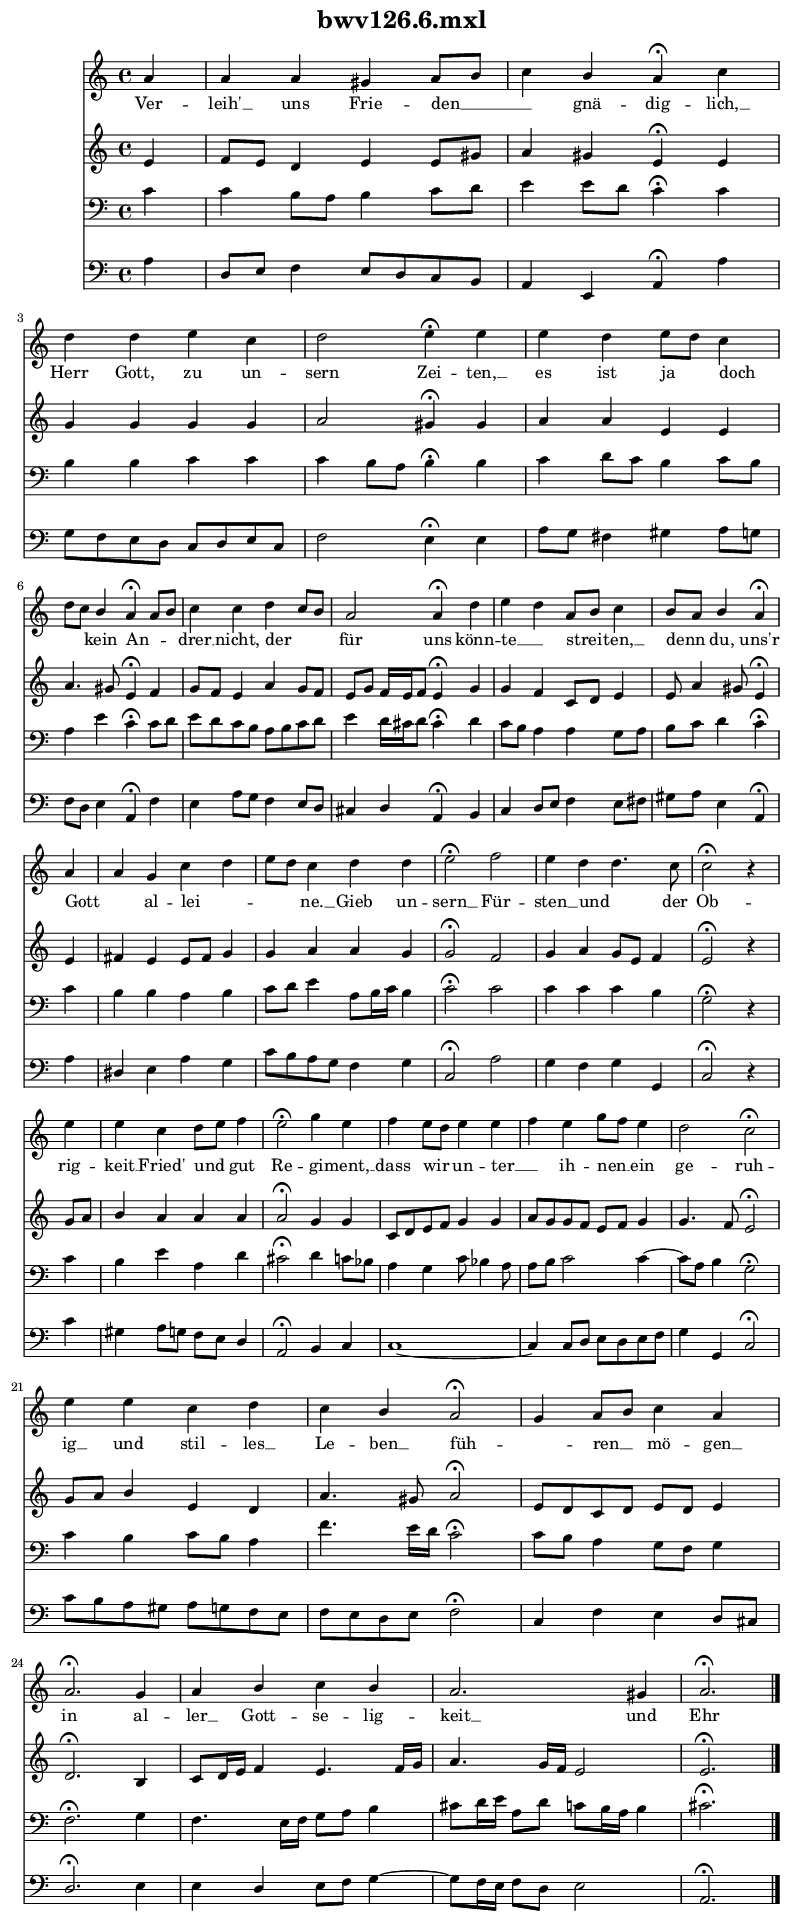

In [73]:
Image(filename=str(b.write('lily.png')))

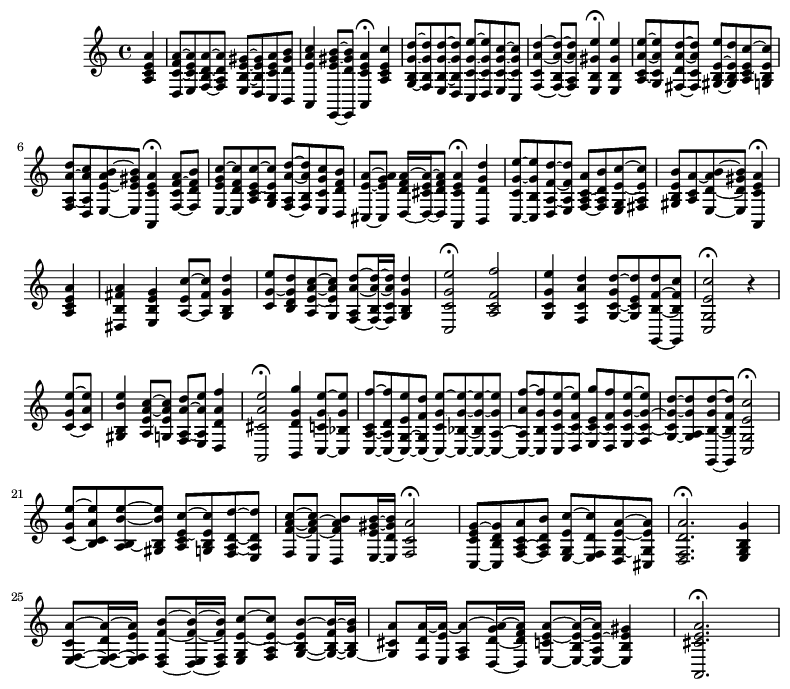

In [75]:
Image(filename=str(b.chordify().write('lily.png')))

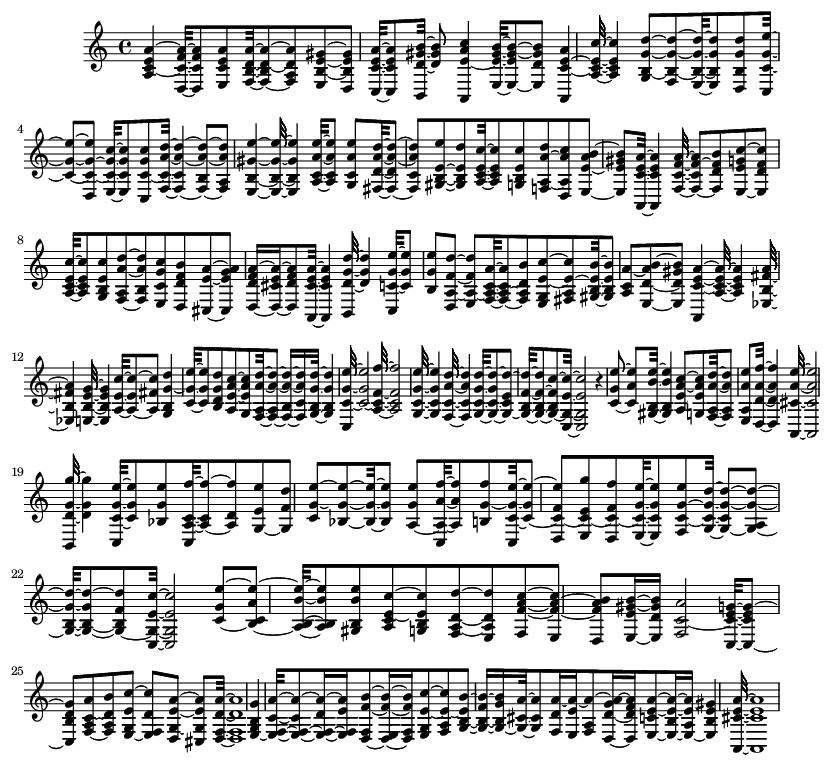

In [74]:
Image(filename=str(s_back.chordify().write('lily.png')))

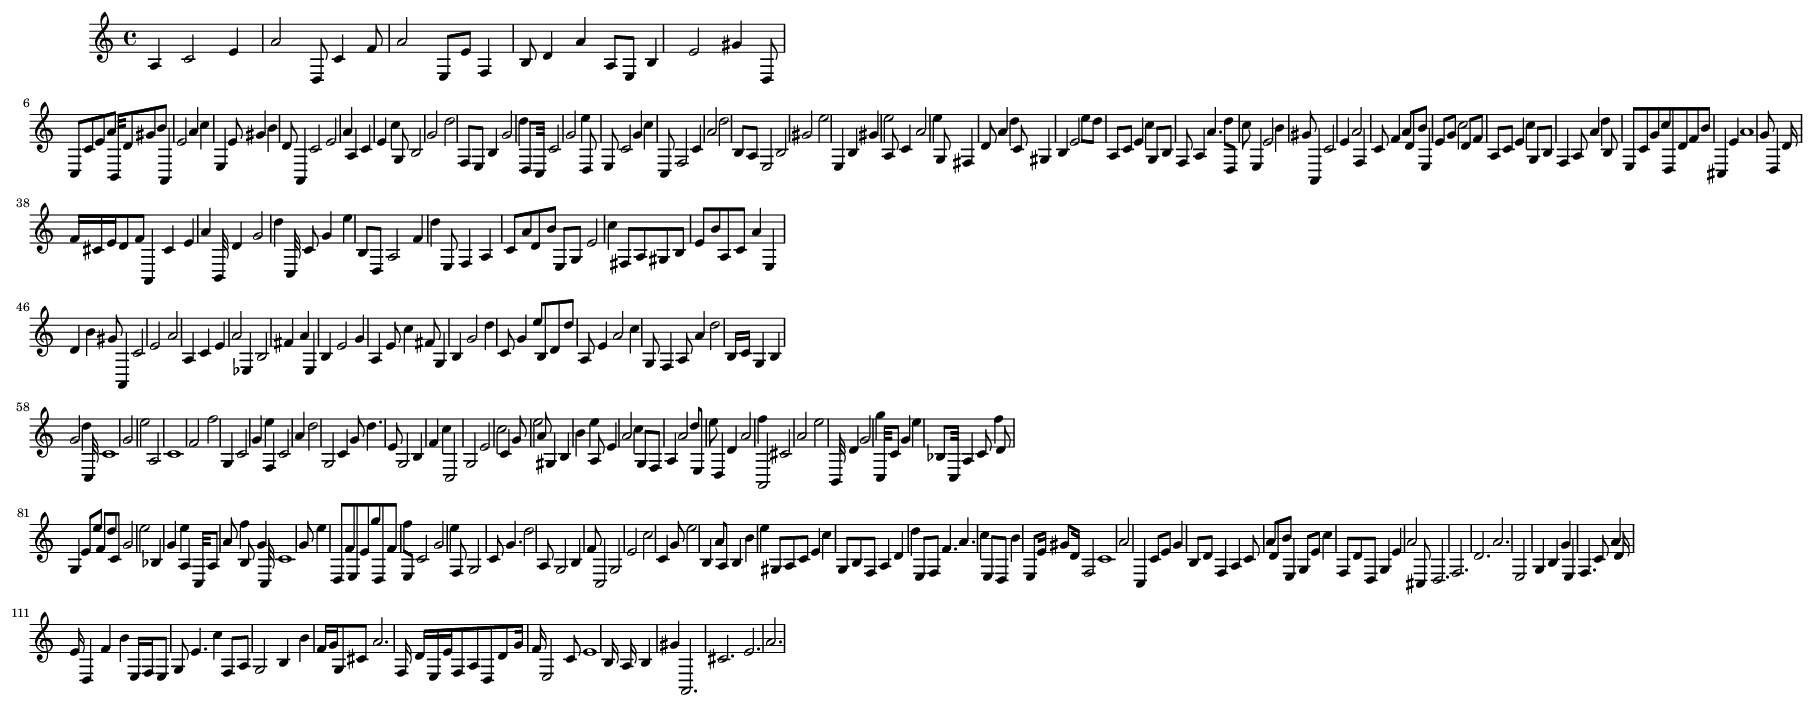

In [72]:
Image(filename=str(s_back.write('lily.png')))

### Imported method

In [57]:
def arrToStreamNotewise(score, sample_freq, note_offset):
    speed=1./sample_freq
    piano_notes=[]
    violin_notes=[]
    time_offset=0
    
    i=0
    while i<len(score):
        if score[i][:9]=="p_octave_":
            add_wait=""
            if score[i][-3:]=="eoc":
                add_wait="eoc"
                score[i]=score[i][:-3]
            this_note=score[i][9:]
            score[i]="p"+this_note
            score.insert(i+1, "p"+str(int(this_note)+12)+add_wait)
            i+=1
        i+=1
        
    for i in range(len(score)):
        if score[i] in ["", " ", "<eos>", "<unk>"]:
            continue
        elif score[i][:3]=="end":
            if score[i][-3:]=="eoc":
                time_offset+=1
            continue
        elif score[i][:4]=="wait":
            time_offset+=int(score[i][4:])
            continue
        else:
            # Look ahead to see if an end<noteid> was generated
            # soon after.  
            duration=1
            has_end=False
            note_string_len = len(score[i])
            for j in range(1,200):
                if i+j==len(score):
                    break
                if score[i+j][:4]=="wait":
                    duration+=int(score[i+j][4:])
                if score[i+j][:3+note_string_len]=="end"+score[i] or score[i+j][:note_string_len]==score[i]:
                    has_end=True
                    break
                if score[i+j][-3:]=="eoc":
                    duration+=1

            if not has_end:
                duration=12

            add_wait = 0
            if score[i][-3:]=="eoc":
                score[i]=score[i][:-3]
                add_wait = 1

            try: 
                new_note=music21.note.Note(int(score[i][1:])+note_offset)    
                new_note.duration = music21.duration.Duration(duration*speed)
#                 print(new_note, new_note.duration)
                new_note.offset=time_offset*speed
                if score[i][0]=="v":
                    violin_notes.append(new_note)
                else:
                    piano_notes.append(new_note)                
            except:
                print("Unknown note: " + score[i])

            

            
            time_offset+=add_wait
    return music21.stream.Stream(piano_notes)